## 1. Importing Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

sns.set()

## 2. Importing Data

In [2]:
train_data = pd.read_csv(r"Data/main_data.csv")

pd.set_option('display.max_columns', None)

In [3]:
# putting the train_data in td

td = train_data

## 3. Data Pre-Processing 

In [4]:
td.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [5]:
# Now we check the size of dataset
td.shape

(10683, 11)

In [6]:
# We check the data type of every feature 
td.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


#### Checking for Missing Values

In [7]:
td.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

##### we see that there is 2 missing values

In [8]:
# we that which two record with nan values 
rows_with_nan =td[td.isnull().any(axis=1)]
print(rows_with_nan)

        Airline Date_of_Journey Source Destination Route Dep_Time  \
9039  Air India       6/05/2019  Delhi      Cochin   NaN    09:45   

      Arrival_Time Duration Total_Stops Additional_Info  Price  
9039  09:25 07 May  23h 40m         NaN         No info   7480  


In [9]:
# As these has only two record so we can drop this two 
td.dropna(inplace=True)

In [10]:
td.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [11]:
td.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10682 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Date_of_Journey  10682 non-null  object
 2   Source           10682 non-null  object
 3   Destination      10682 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10682 non-null  object
 6   Arrival_Time     10682 non-null  object
 7   Duration         10682 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10682 non-null  object
 10  Price            10682 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 1001.4+ KB


In [12]:
# we checking the Unique values count from every fearture 
td.nunique()

Airline              12
Date_of_Journey      44
Source                5
Destination           6
Route               128
Dep_Time            222
Arrival_Time       1343
Duration            368
Total_Stops           5
Additional_Info      10
Price              1870
dtype: int64

### Finding Duplicates

In [13]:
# Finding the missing values from the dataset
td[td.duplicated()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
683,Jet Airways,1/06/2019,Delhi,Cochin,DEL → NAG → BOM → COK,14:35,04:25 02 Jun,13h 50m,2 stops,No info,13376
1061,Air India,21/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,22:00,19:15 22 May,21h 15m,2 stops,No info,10231
1348,Air India,18/05/2019,Delhi,Cochin,DEL → HYD → BOM → COK,17:15,19:15 19 May,26h,2 stops,No info,12392
1418,Jet Airways,6/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,05:30,04:25 07 Jun,22h 55m,2 stops,In-flight meal not included,10368
1674,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,18:25,21:20,2h 55m,non-stop,No info,7303
...,...,...,...,...,...,...,...,...,...,...,...
10594,Jet Airways,27/06/2019,Delhi,Cochin,DEL → AMD → BOM → COK,23:05,12:35 28 Jun,13h 30m,2 stops,No info,12819
10616,Jet Airways,1/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,09:40,12:35 02 Jun,26h 55m,2 stops,No info,13014
10634,Jet Airways,6/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,09:40,12:35 07 Jun,26h 55m,2 stops,In-flight meal not included,11733
10672,Jet Airways,27/06/2019,Delhi,Cochin,DEL → AMD → BOM → COK,23:05,19:00 28 Jun,19h 55m,2 stops,In-flight meal not included,11150


### Handeling Duplicates

In [14]:
# finding the duplicates record count 
td.duplicated().sum()

220

In [15]:
# Before dropping size of dataset
td.shape

(10682, 11)

In [16]:
# Dropping the duplicates row from the dataset 
td.drop_duplicates(inplace= True)

In [17]:
# After Dropping size of dataset
td.shape

(10462, 11)

In [18]:
td.describe()

,Price
count,10462.000000
mean,9026.790289
std,4624.849541
min,1759.000000
25%,5224.000000
50%,8266.000000
75%,12344.750000
max,79512.000000


## 4. Feature Generation

In [19]:
td.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662


In [20]:
td.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10462 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10462 non-null  object
 1   Date_of_Journey  10462 non-null  object
 2   Source           10462 non-null  object
 3   Destination      10462 non-null  object
 4   Route            10462 non-null  object
 5   Dep_Time         10462 non-null  object
 6   Arrival_Time     10462 non-null  object
 7   Duration         10462 non-null  object
 8   Total_Stops      10462 non-null  object
 9   Additional_Info  10462 non-null  object
 10  Price            10462 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 980.8+ KB


##### First we have to convert the object datatype into datmetime datatype so it will become easy to read the values and predict 

In [21]:
# Now we extract the date and month from Date_of_Journey and creating new colums like Journey_date and Journey_month
# And here we are using to_datetime to convert the feature like Date_of_Journey from string to datetime column

#Extracting date
td["Journey_date"] = pd.to_datetime(td.Date_of_Journey, format="%d/%m/%Y").dt.day

#Extracting month
td["Journey_month"] = pd.to_datetime(td.Date_of_Journey, format="%d/%m/%Y").dt.month

In [22]:
td.head(1)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_date,Journey_month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3


In [23]:
# Now we extract the hour and minute from Dep_Time and creating new colums like Departure_hour and Departure_minute

#Extracting hour
td["Departure_hour"] = pd.to_datetime(td.Dep_Time).dt.hour

#Extracting minute
td["Departure_minute"] = pd.to_datetime(td.Dep_Time).dt.minute

In [24]:
td.head(1)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_date,Journey_month,Departure_hour,Departure_minute
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20


In [25]:
# Now we extract the hour and minute from Arrival_Time and creating new colums like Arrival_hour and Arrival_minute

#Extracting Hours
td["Arrival_hour"] = pd.to_datetime(td.Arrival_Time).dt.hour

#Extracting Minutes
td["Arrival_minute"] = pd.to_datetime(td.Arrival_Time).dt.minute

In [26]:
td.head(1)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_date,Journey_month,Departure_hour,Departure_minute,Arrival_hour,Arrival_minute
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20,1,10


In [27]:
# now split the hour and minute from Duration 

# Assigning and converting Duration column into list 
duration = list(td["Duration"])            

for i in range(len(duration)):
    if len(duration[i].split()) !=2:                # Checking if duration contains hour or minute
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adding 0 minute 
        else:
            duration[i]= "0h " + duration[i]            # Adding 0 hours
            
duration_hour = []
duration_minute = []
for i in range(len(duration)):
    duration_hour.append(int(duration[i].split(sep = "h")[0]))            # Extract hours from duration 
    duration_minute.append(int(duration[i].split(sep = "m")[0].split()[-1]))          # Extract minute from duration

In [28]:
# Adding duration_hour and duration_minute list to td dataframe

td["duration_hour"] = duration_hour
td["duration_minute"] = duration_minute

In [29]:
td.head(1)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_date,Journey_month,Departure_hour,Departure_minute,Arrival_hour,Arrival_minute,duration_hour,duration_minute
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20,1,10,2,50


### Now I am creating the weekend column
   1) I use this column so it help our model to read this data and get better accuracy in price prediction
   2) It is also use for better visualization and good understanding price difference between weekends and weekdays

In [30]:
# Converting 'Date_of_Journey' column to datetime format
td['Date_of_Journey'] = pd.to_datetime(td['Date_of_Journey'])

# Create a new column 'Weekend' to indicate whether the date falls on a weekend
td['Weekend'] = (td['Date_of_Journey'].dt.dayofweek >= 5).astype(int)

# 0 for weekdays (Monday to Friday), 1 for weekends (Saturday and Sunday)

In [31]:
td.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_date,Journey_month,Departure_hour,Departure_minute,Arrival_hour,Arrival_minute,duration_hour,duration_minute,Weekend
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20,1,10,2,50,1
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,5,50,13,15,7,25,0


#### Now I am creating Night feature so that we know the price difference in night

In [32]:
td["Night"] = (td["Departure_hour"] >=19).astype(int)

In [33]:
td.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_date,Journey_month,Departure_hour,Departure_minute,Arrival_hour,Arrival_minute,duration_hour,duration_minute,Weekend,Night
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20,1,10,2,50,1,1
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,5,50,13,15,7,25,0,0


#### Now I am creating Day_of_Week column which show us the exact day Sunday,Monday etc.

In [34]:
# Converting 'Date_of_Journey' column to datetime format if not already
td['Date_of_Journey'] = pd.to_datetime(td['Date_of_Journey'])

# Creating a new column to represent the day of the week (0 = Monday, 6 = Sunday)
td['Day_of_Week'] = td['Date_of_Journey'].dt.dayofweek

# Maping the day of the week to its name (Monday, Tuesday, etc.)
day_name_map = {
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday'
}
td['Day_of_Week'] = td['Day_of_Week'].map(day_name_map)

# Now, 'Day_of_Week' column will contain the day names

In [35]:
td.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_date,Journey_month,Departure_hour,Departure_minute,Arrival_hour,Arrival_minute,duration_hour,duration_minute,Weekend,Night,Day_of_Week
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20,1,10,2,50,1,1,Sunday
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,5,50,13,15,7,25,0,0,Wednesday
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25,4,25,19,0,1,0,Sunday
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,18,5,23,30,5,25,1,0,Sunday
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,16,50,21,35,4,45,0,0,Friday


## 5. Data Inconsistency

### Handeling Data Inconsistency

In [36]:
# Now we see the unique value for Airline 

td["Airline"].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

### Observation:
   1) Here we see that some Airlines name belong to same airline company
   2) So we see there is Data Inconsistency 
   3) Now we handle this Inconsistency

In [37]:
td['Airline'] =td['Airline'].str.replace("Vistara Premium economy", "Vistara")
td['Airline'] =td['Airline'].str.replace("Jet Airways Business", "Jet Airways")
td['Airline'] =td['Airline'].str.replace("Multiple carriers Premium economy", "Multiple carriers")

In [38]:
td["Airline"].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia', 'Trujet'],
      dtype=object)

In [39]:
# checking the count of unique value  after replace
td["Airline"].nunique()

9

In [40]:
# Same we have to do for destination feature
td["Destination"].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [41]:
td["Source"].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [42]:
td['Destination'] =td['Destination'].str.replace("New Delhi", "Delhi")

In [43]:
td.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price', 'Journey_date', 'Journey_month',
       'Departure_hour', 'Departure_minute', 'Arrival_hour', 'Arrival_minute',
       'duration_hour', 'duration_minute', 'Weekend', 'Night', 'Day_of_Week'],
      dtype='object')

#### Here this column having categorical values so to convert the column values in Numerical value i am doing Label Encoding 

In [44]:
td['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [45]:
td['Total_Stops'] = td['Total_Stops'].replace({'non-stop':'0', '1 stop':'1', '2 stops': '2',
                                               '3 stops': '3','4 stops':'4'})

In [46]:
td['Total_Stops'].unique()

array(['0', '2', '1', '3', '4'], dtype=object)

In [47]:
td.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_date,Journey_month,Departure_hour,Departure_minute,Arrival_hour,Arrival_minute,duration_hour,duration_minute,Weekend,Night,Day_of_Week
0,IndiGo,2019-03-24,Banglore,Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,0,No info,3897,24,3,22,20,1,10,2,50,1,1,Sunday
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2,No info,7662,1,5,5,50,13,15,7,25,0,0,Wednesday


## 6. Data Visualization

In [48]:
td.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10462 entries, 0 to 10682
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Airline           10462 non-null  object        
 1   Date_of_Journey   10462 non-null  datetime64[ns]
 2   Source            10462 non-null  object        
 3   Destination       10462 non-null  object        
 4   Route             10462 non-null  object        
 5   Dep_Time          10462 non-null  object        
 6   Arrival_Time      10462 non-null  object        
 7   Duration          10462 non-null  object        
 8   Total_Stops       10462 non-null  object        
 9   Additional_Info   10462 non-null  object        
 10  Price             10462 non-null  int64         
 11  Journey_date      10462 non-null  int32         
 12  Journey_month     10462 non-null  int32         
 13  Departure_hour    10462 non-null  int32         
 14  Departure_minute  10462 non

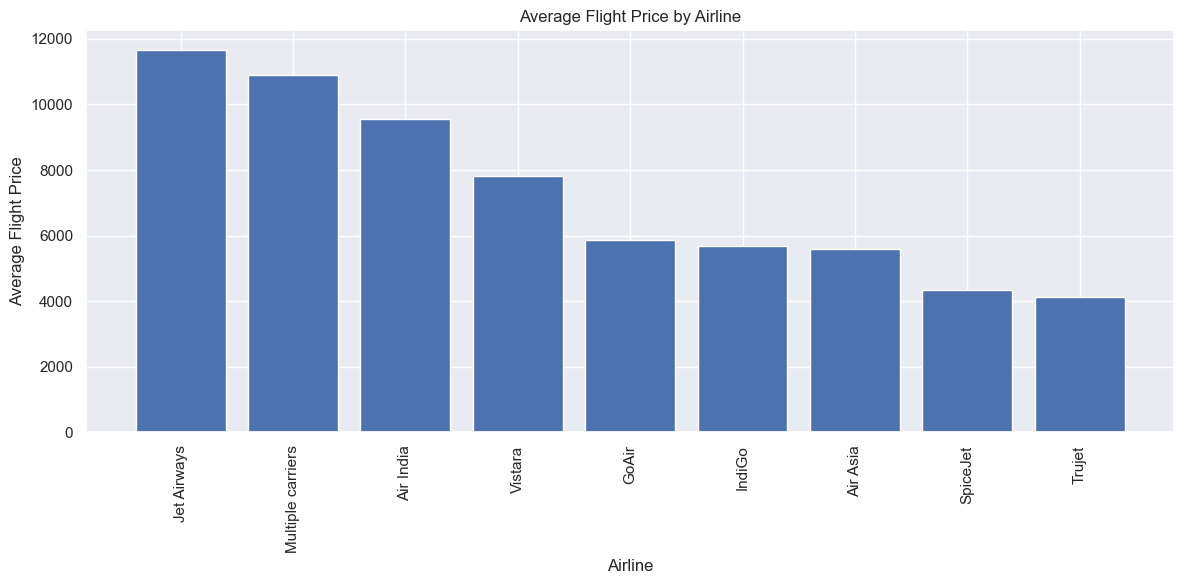

In [49]:
# Now we do some visualization for more Understanding

# Grouping the data by 'Airline' and calculating the mean flight prices for each airline
airline_prices = td.groupby('Airline')['Price'].mean().reset_index()

# sorting the airlines by average price in decending order
airline_prices = airline_prices.sort_values(by="Price", ascending =False)

# Creating a bar chart
plt.figure(figsize=(12, 6))
plt.bar(airline_prices['Airline'], airline_prices['Price'])
plt.xlabel('Airline')
plt.ylabel('Average Flight Price')
plt.title('Average Flight Price by Airline')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

#### Observation :
   1) After seeing the chart we find that Average Flight Price for Jet Airways is Higher than other Airlines
   2) And Air Asia, SpiceJet and Trujet has very low average ticket price than other so we say that this Airline has very
        Afforedable ticket Price

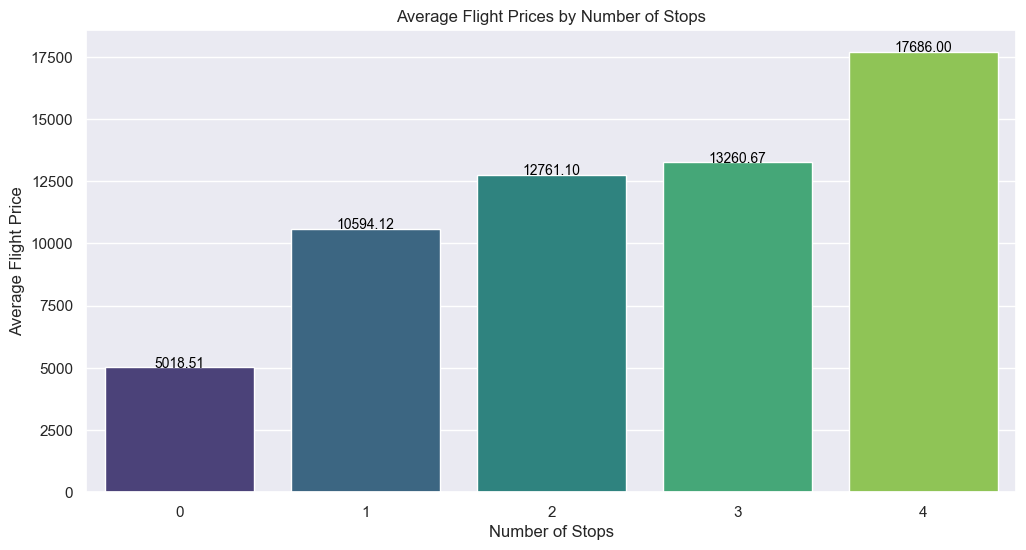

In [50]:
# Now we see that How does the Number of stops affect the flight price

# Creating a bar chart comparing prices for different stop categories
plt.figure(figsize=(12, 6))  # we can Adjust the figure size as needed

# Grouping the data by 'Total_Stops' and calculating the average flight price for each category
average_prices_by_stops = td.groupby('Total_Stops')['Price'].mean().reset_index()

# Sorting the categories by average price in ascending order for the bar chart
average_prices_by_stops = average_prices_by_stops.sort_values(by='Price', ascending=True)

# Creating the bar chart
ax = sns.barplot(x='Total_Stops', y='Price', data=average_prices_by_stops, palette='viridis')

# Adding exact price values on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline', fontsize=10, color='black')

plt.xlabel('Number of Stops')
plt.ylabel('Average Flight Price')
plt.title('Average Flight Prices by Number of Stops')
plt.show()

#### Observation:
   1) We see that there is the massive price change by just changing the Number of Stops 
   2) So we can say that Number of Stops play a Major role in Flight Price 
   3) we also say that number of Stop is positively corelated with flight price
   4) As the number of total_stop increases the flight price is also increases

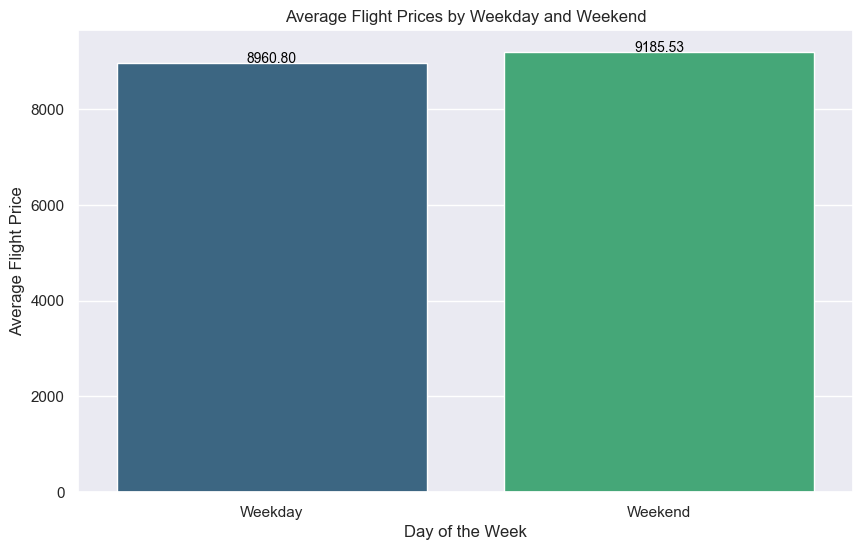

In [51]:
# Assuming your DataFrame is named 'td' and you have a 'Weekend' column

# Creating a bar chart comparing weekend and weekday prices
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

# Grouping the data by 'Weekend' and calculating the average flight price for each category
average_prices_by_weekend = td.groupby('Weekend')['Price'].mean().reset_index()

# Creating the bar chart
ax = sns.barplot(x='Weekend', y='Price', data=average_prices_by_weekend, palette='viridis')

# Adding exact price values on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline', fontsize=10, color='black')

plt.xticks([0, 1], ['Weekday', 'Weekend'])  # Set the x-axis labels
plt.xlabel('Day of the Week')
plt.ylabel('Average Flight Price')
plt.title('Average Flight Prices by Weekday and Weekend')
plt.show()

### Observation:

   1) After looking the bars we say that flight price of Weekends is Slightly Higher than Weekdays 
   2) So we can say that it will help our model to read and more accurate prediction of price

In [52]:
td.describe().T

,count,mean,min,25%,50%,75%,max,std
Date_of_Journey,10462,2019-05-04 13:38:33.056776960,2019-03-01 00:00:00,2019-03-27 00:00:00,2019-05-15 00:00:00,2019-06-06 00:00:00,2019-06-27 00:00:00,NaN
Price,10462.0,9026.790289,1759.0,5224.0,8266.0,12344.75,79512.0,4624.849541
Journey_date,10462.0,13.4632,1.0,6.0,12.0,21.0,27.0,8.467493
Journey_month,10462.0,4.701491,3.0,3.0,5.0,6.0,6.0,1.163802
Departure_hour,10462.0,12.478494,0.0,8.0,11.0,18.0,23.0,5.727227
Departure_minute,10462.0,24.404989,0.0,5.0,25.0,40.0,55.0,18.815719
Arrival_hour,10462.0,13.387689,0.0,8.0,14.0,19.0,23.0,6.855547
Arrival_minute,10462.0,24.719939,0.0,10.0,25.0,35.0,55.0,16.57045
duration_hour,10462.0,10.02619,0.0,2.0,8.0,15.0,47.0,8.378023
duration_minute,10462.0,28.210189,0.0,15.0,30.0,45.0,55.0,16.879185


In [53]:
td['Total_Stops'].value_counts()

Total_Stops
1    5625
0    3475
2    1318
3      43
4       1
Name: count, dtype: int64

<Axes: xlabel='Total_Stops', ylabel='count'>

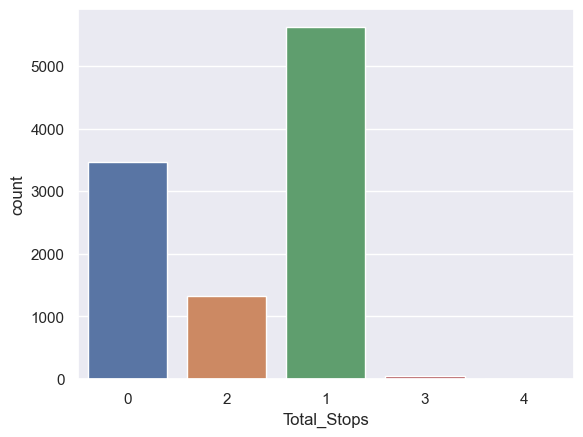

In [54]:
sns.countplot(x="Total_Stops",  data=td)

#### Observation:

   1) After see this we say that count of Total_Stop 1 is comparatively more that other flights
   2) We also say that most of the people are travelling with only 1 Stop journey and it is also budget 
      friendly.
                

In [55]:
td.groupby(["Total_Stops"])["Airline"].value_counts()

Total_Stops  Airline          
0            IndiGo               1231
             SpiceJet              667
             Jet Airways           622
             Air India             416
             Vistara               266
             Air Asia              181
             GoAir                  92
1            Jet Airways          2539
             Multiple carriers    1158
             IndiGo                793
             Air India             540
             Vistara               215
             SpiceJet              148
             Air Asia              129
             GoAir                 102
             Trujet                  1
2            Air India             702
             Jet Airways           545
             Multiple carriers      43
             IndiGo                 19
             Air Asia                9
3            Air India              35
             Multiple carriers       8
4            Air India               1
Name: count, dtype: int64

<Axes: xlabel='Departure_hour', ylabel='count'>

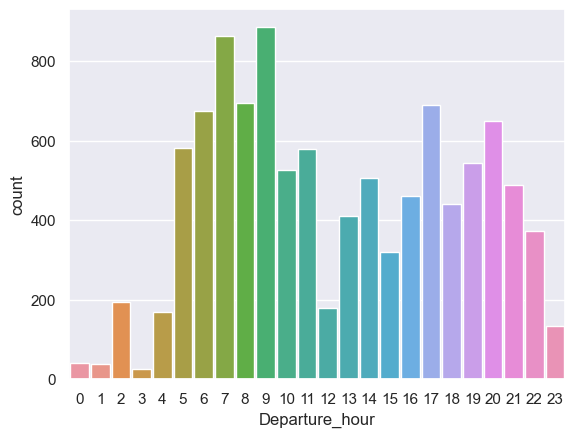

In [56]:
sns.countplot(x='Departure_hour',data=td ,width=0.9)

#### Observation:

   1) we see that flight Takeoff count is more between 5am to 11am 
   2) And than between 5pm to 8pm in evening

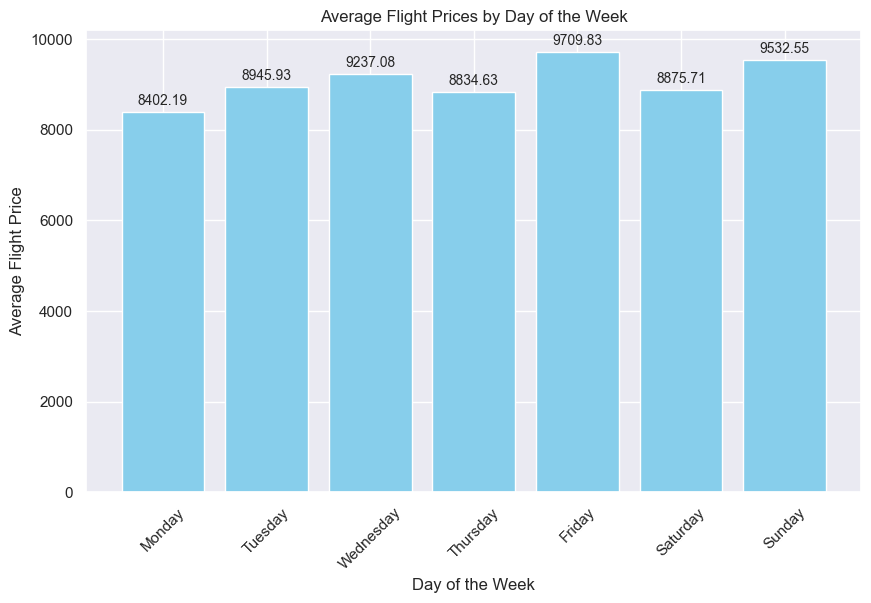

In [57]:
# Now we see that in a wwek which day the price of flight is more 

# Grouping the data by 'Day_of_Week' and calculating the average flight price for each day
average_prices_by_day = td.groupby('Day_of_Week')['Price'].mean().reset_index()

# Defining the order of days of the week for proper ordering in the chart
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Sorting the data by the specified order
average_prices_by_day['Day_of_Week'] = pd.Categorical(average_prices_by_day['Day_of_Week'], categories=day_order, ordered=True)
average_prices_by_day = average_prices_by_day.sort_values('Day_of_Week')

# Creating a bar chart
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

# Creating the bar chart
ax = plt.bar(average_prices_by_day['Day_of_Week'], average_prices_by_day['Price'], color='skyblue')

# Add exact price values on top of each bar
for bar in ax:
    height = bar.get_height()
    plt.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height), xytext=(0, 3),
                 textcoords='offset points', ha='center', va='bottom', fontsize=10)

plt.xlabel('Day of the Week')
plt.ylabel('Average Flight Price')
plt.title('Average Flight Prices by Day of the Week')
plt.xticks(rotation=45)
plt.show()

#### Observation :

   1) It appears that flight prices tend to be higher on Fridays and Sundays. This could be due to the fact that                     these days are typically associated with weekend travel, and airlines may charge a premium for flights                         during peak leisure travel periods.
      
   
                
   2) Fridays are often popular days for business travelers, while Sundays are common for return trips from                           weekend getaways or vacations. Business travelers may be willing to pay more for flights, and this could                       contribute to higher average prices.
   
                
   3) Travelers who book last-minute flights, especially for weekend getaways or urgent business trips, may                           encounter higher prices due to limited availability. 

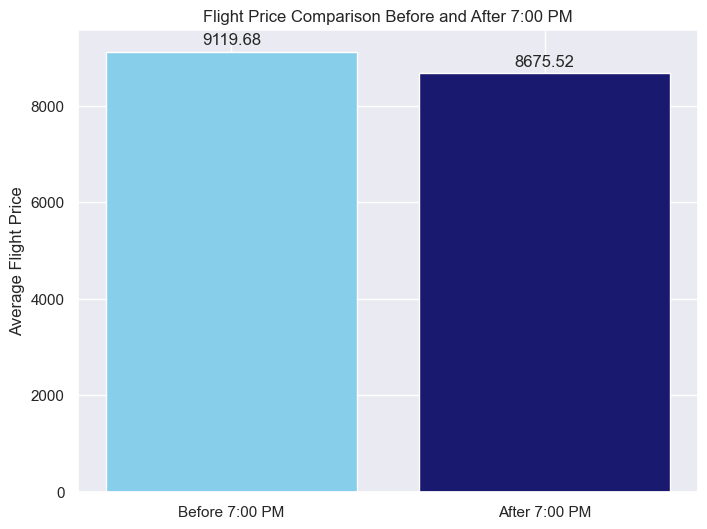

In [58]:
# Using Night column we can see the flight price pattern difference in day or night.

# Creating two subsets of the data: before 7:00 p.m. (day) and after 7:00 p.m. (night)
day_prices = td[td['Night'] == 0]['Price']
night_prices = td[td['Night'] == 1]['Price']

# Creating a bar chart to compare flight prices
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed

# Creating the bar chart
ax = plt.bar(['Before 7:00 PM', 'After 7:00 PM'], [day_prices.mean(), night_prices.mean()], color=['skyblue', 'midnightblue'])
plt.ylabel('Average Flight Price')
plt.title('Flight Price Comparison Before and After 7:00 PM')

# Adding exact price values on top of each bar
for bar in ax:
    height = bar.get_height()
    plt.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height), xytext=(0, 3),
                 textcoords='offset points', ha='center', va='bottom', fontsize=12)

plt.show()

#### Observation :

   1) The period before 7:00 PM appears to coincide with peak travel hours when prices are generally higher.
      Travelers who need to fly during peak hours may expect to pay a premium for the convenience of daytime flights.
                
   2) Airlines may employ dynamic pricing strategies that adjust fares based on factors such as demand, supply,
      and time of day.
      Pricing adjustments can be influenced by factors like business travel, leisure travel, and route popularity.              
   3) These observations can help travelers to make a right decisions about when to book flights and what to expect in terms of         pricing.

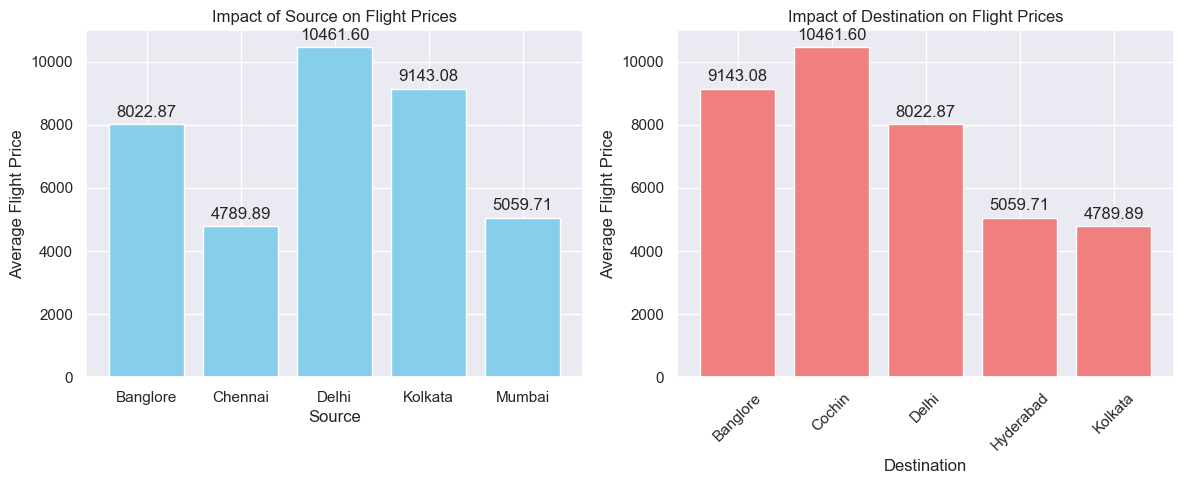

In [59]:
# Calculate the average flight price for each source location
source_prices = td.groupby('Source')['Price'].mean().reset_index()

# Calculate the average flight price for each destination location
destination_prices = td.groupby('Destination')['Price'].mean().reset_index()

# Create a figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Plot the impact of 'Source' on flight prices
ax1.bar(source_prices['Source'], source_prices['Price'], color='skyblue')
ax1.set_xlabel('Source')
ax1.set_ylabel('Average Flight Price')
ax1.set_title('Impact of Source on Flight Prices')

# Plot the impact of 'Destination' on flight prices
ax2.bar(destination_prices['Destination'], destination_prices['Price'], color='lightcoral')
ax2.set_xlabel('Destination')
ax2.set_ylabel('Average Flight Price')
ax2.set_title('Impact of Destination on Flight Prices')

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=45)

# Annotate each bar with the exact price value
for bar1, price1 in zip(ax1.patches, source_prices['Price']):
    ax1.annotate(f'{price1:.2f}', xy=(bar1.get_x() + bar1.get_width() / 2, bar1.get_height()),
                 xytext=(0, 3), textcoords='offset points', ha='center', va='bottom')

for bar2, price2 in zip(ax2.patches, destination_prices['Price']):
    ax2.annotate(f'{price2:.2f}', xy=(bar2.get_x() + bar2.get_width() / 2, bar2.get_height()),
                 xytext=(0, 3), textcoords='offset points', ha='center', va='bottom')

# Adjust layout spacing
plt.tight_layout()

# Display the two bar charts side by side
plt.show()

#### Observation :

   1) The average flight price varies significantly depending on both the source and destination locations.
      For instance, flights originating from Delhi have an average price of ₹10,461.60, while those from Chennai
      have an average price of ₹4,789.89.
                
   2) Delhi emerges as a high-priced source with an average flight cost of ₹10,461.60. This could be due to its status as a           major transportation hub.
      Cochin stands out as a high-priced destination with the same average flight cost, possibly due to its popularity as a           tourist and business destination.              
   3) These observations can help travelers make informed decisions when booking flights and provide insights into how airlines       price flights based on source and destination locations.

##  7. Backup Of My Dataset

In [60]:
# We doing this for just safety 
backup_data = td.copy()

In [61]:
backup_data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_date,Journey_month,Departure_hour,Departure_minute,Arrival_hour,Arrival_minute,duration_hour,duration_minute,Weekend,Night,Day_of_Week
0,IndiGo,2019-03-24,Banglore,Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,0,No info,3897,24,3,22,20,1,10,2,50,1,1,Sunday
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2,No info,7662,1,5,5,50,13,15,7,25,0,0,Wednesday


##  8. Handeling Catagorical Data

  ##### we can find many ways to handle categorical data.Some of them categorical data are
  
   1. **Nominal Data** --> When data are not in any order than use **OneHotEncoding Technique**
   2. **Ordinal Data** --> When data are in order than use **LabelEncoder Technique**

In [62]:
td.head(1)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_date,Journey_month,Departure_hour,Departure_minute,Arrival_hour,Arrival_minute,duration_hour,duration_minute,Weekend,Night,Day_of_Week
0,IndiGo,2019-03-24,Banglore,Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,0,No info,3897,24,3,22,20,1,10,2,50,1,1,Sunday


In [63]:
# As Airline is Nominal Categorical data we will perform OnHotEncoding


Airline = td[["Airline"]]

Airline = pd.get_dummies(Airline, drop_first= True, dtype=int)

Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Multiple carriers,Airline_SpiceJet,Airline_Trujet,Airline_Vistara
0,0,0,1,0,0,0,0,0
1,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0
3,0,0,1,0,0,0,0,0
4,0,0,1,0,0,0,0,0


In [64]:
td['Airline'].dtype


dtype('O')

In [65]:
# As Source is Nominal Categorical data we will perform OnHotEncoding

Source = td[["Source"]]

Source = pd.get_dummies(Source, drop_first= True, dtype=int)

Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [66]:
# As Destination is Nominal Categorical data we will perform OnHotEncoding

Destination = td[["Destination"]]

Destination = pd.get_dummies(Destination, drop_first= True, dtype=int)

Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata
0,0,1,0,0
1,0,0,0,0
2,1,0,0,0
3,0,0,0,0
4,0,1,0,0


In [67]:
td.shape

(10462, 22)

In [68]:
# Now the column Day_of_Week having the Categorical values and it has ordinal data
# so i am applying the Label Encoding Technique 

td['Day_of_Week'].unique()

array(['Sunday', 'Wednesday', 'Friday', 'Monday', 'Tuesday', 'Saturday',
       'Thursday'], dtype=object)

In [69]:
td['Day_of_Week'] = td['Day_of_Week'].replace({'Monday':'1', 'Tuesday':'2', 'Wednesday': '3',
                                               'Thursday': '4','Friday':'5','Saturday':'6','Sunday':'7'})

In [70]:
td['Day_of_Week'].unique()

array(['7', '3', '5', '1', '2', '6', '4'], dtype=object)

In [71]:
td.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_date,Journey_month,Departure_hour,Departure_minute,Arrival_hour,Arrival_minute,duration_hour,duration_minute,Weekend,Night,Day_of_Week
0,IndiGo,2019-03-24,Banglore,Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,0,No info,3897,24,3,22,20,1,10,2,50,1,1,7
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2,No info,7662,1,5,5,50,13,15,7,25,0,0,3
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2,No info,13882,9,6,9,25,4,25,19,0,1,0,7


In [72]:
# Now we concatinate the all dataframe after applying both encoding techinque 
# td + Airline + Source + Destination

train_td = pd.concat([td,Airline,Source,Destination], axis =1)

In [73]:
train_td.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_date,Journey_month,Departure_hour,Departure_minute,Arrival_hour,Arrival_minute,duration_hour,duration_minute,Weekend,Night,Day_of_Week,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Multiple carriers,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata
0,IndiGo,2019-03-24,Banglore,Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,0,No info,3897,24,3,22,20,1,10,2,50,1,1,7,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2,No info,7662,1,5,5,50,13,15,7,25,0,0,3,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [74]:
# Before dropping features 
train_td.shape

(10462, 38)

## 9. Dropping feature

In [75]:
# After all this data preprocessing now we drop the all the categorical features because we have converted that
# column in numerical   
# Here Route is highly co-related with total _stop so we dropping this column
# And  Additional_Info column has more rows with no_info  so we dropping this column also

train_td.drop(['Airline','Date_of_Journey','Source','Destination','Route','Dep_Time','Arrival_Time','Duration','Additional_Info'], axis=1, inplace=True)


In [76]:
# After dropping features
train_td.shape

(10462, 29)

In [77]:
train_td.head()

,Total_Stops,Price,Journey_date,Journey_month,Departure_hour,Departure_minute,Arrival_hour,Arrival_minute,duration_hour,duration_minute,Weekend,Night,Day_of_Week,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Multiple carriers,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata
0,0,3897,24,3,22,20,1,10,2,50,1,1,7,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
1,2,7662,1,5,5,50,13,15,7,25,0,0,3,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,1,0,7,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,1,0,7,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,0,0,5,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0


## 10. Test Data

#### Now we will do same data preprocessing with test data set whatever we have done in train dataset

In [78]:
test_data = pd.read_excel(r"Test_set.xlsx")

pd.set_option('display.max_columns', None)

In [79]:
# putting the test_data in td

td1 = test_data

In [80]:
td1.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info


In [81]:
td1.shape

(2671, 10)

In [82]:
td1.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

In [83]:
# Finding the missing values from the dataset
td1[td1.duplicated()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
294,Jet Airways,12/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,05:30,04:25 13 Jun,22h 55m,2 stops,No info
794,Jet Airways,12/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,05:30,04:25 13 Jun,22h 55m,2 stops,In-flight meal not included
909,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,20:00,22:55,2h 55m,non-stop,No info
974,Air India,12/06/2019,Kolkata,Banglore,CCU → DEL → AMD → BLR,07:00,05:25 13 Jun,22h 25m,2 stops,No info
1011,Jet Airways,9/05/2019,Delhi,Cochin,DEL → JAI → BOM → COK,05:30,04:25 10 May,22h 55m,2 stops,No info
1033,Multiple carriers,15/05/2019,Delhi,Cochin,DEL → BOM → COK,07:30,19:15,11h 45m,1 stop,No info
1044,GoAir,24/03/2019,Banglore,New Delhi,BLR → DEL,20:55,23:50,2h 55m,non-stop,No info
1233,Jet Airways,6/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,05:30,04:25 07 Jun,22h 55m,2 stops,No info
1504,Air India,15/06/2019,Delhi,Cochin,DEL → GOI → BOM → COK,22:00,19:15 16 Jun,21h 15m,2 stops,No info
1537,Jet Airways,6/06/2019,Delhi,Cochin,DEL → NAG → BOM → COK,06:45,04:25 07 Jun,21h 40m,2 stops,In-flight meal not included


In [84]:
# Now we handel the duplicate record

td1.duplicated().sum()

26

In [85]:
# before dropping duplicate record
td1.shape


(2671, 10)

In [86]:
# Dropping the duplicates row from the dataset 
td1.drop_duplicates(inplace= True)

In [87]:
# After dropping duplicate record
td1.shape

(2645, 10)

In [88]:
# Now we generate some feature 
td1.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [89]:
td1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2645 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2645 non-null   object
 1   Date_of_Journey  2645 non-null   object
 2   Source           2645 non-null   object
 3   Destination      2645 non-null   object
 4   Route            2645 non-null   object
 5   Dep_Time         2645 non-null   object
 6   Arrival_Time     2645 non-null   object
 7   Duration         2645 non-null   object
 8   Total_Stops      2645 non-null   object
 9   Additional_Info  2645 non-null   object
dtypes: object(10)
memory usage: 227.3+ KB


In [90]:
# Now we extract the date and month from Date_of_Journey and creating new colums like Journey_date and Journey_month
# And here we are using to_datetime to convert the feature like Date_of_Journey from string to datetime column

#Extracting date
td1["Journey_date"] = pd.to_datetime(td1.Date_of_Journey, format="%d/%m/%Y").dt.day

#Extracting month
td1["Journey_month"] = pd.to_datetime(td1.Date_of_Journey, format="%d/%m/%Y").dt.month

In [91]:
td1.head(1)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Journey_date,Journey_month
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,6,6


In [92]:
# Now we extract the hour and minute from Dep_Time and creating new colums like Departure_hour and Departure_minute

#Extracting hour
td1["Departure_hour"] = pd.to_datetime(td1.Dep_Time).dt.hour

#Extracting minute
td1["Departure_minute"] = pd.to_datetime(td1.Dep_Time).dt.minute

In [93]:
td1.head(1)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Journey_date,Journey_month,Departure_hour,Departure_minute
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,6,6,17,30


In [94]:
# Now we extract the hour and minute from Arrival_Time and creating new colums like Arrival_hour and Arrival_minute

#Extracting Hours
td1["Arrival_hour"] = pd.to_datetime(td1.Arrival_Time).dt.hour

#Extracting Minutes
td1["Arrival_minute"] = pd.to_datetime(td1.Arrival_Time).dt.minute

In [95]:
td1.head(1)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Journey_date,Journey_month,Departure_hour,Departure_minute,Arrival_hour,Arrival_minute
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,6,6,17,30,4,25


In [96]:
# now split the hour and minute from Duration 

# Assigning and converting Duration column into list 
duration = list(td1["Duration"])            

for i in range(len(duration)):
    if len(duration[i].split()) !=2:                # Checking if duration contains hour or minute
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adding 0 minute 
        else:
            duration[i]= "0h " + duration[i]            # Adding 0 hours
            
duration_hour = []
duration_minute = []
for i in range(len(duration)):
    duration_hour.append(int(duration[i].split(sep = "h")[0]))            # Extract hours from duration 
    duration_minute.append(int(duration[i].split(sep = "m")[0].split()[-1]))          # Extract minute from duration

In [97]:
# Adding duration_hour and duration_minute list to td dataframe

td1["duration_hour"] = duration_hour
td1["duration_minute"] = duration_minute

In [98]:
td1.head(1)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Journey_date,Journey_month,Departure_hour,Departure_minute,Arrival_hour,Arrival_minute,duration_hour,duration_minute
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,6,6,17,30,4,25,10,55


In [99]:
# Converting 'Date_of_Journey' column to datetime format
td1['Date_of_Journey'] = pd.to_datetime(td1['Date_of_Journey'],format= '%d/%m/%Y')

# Create a new column 'Weekend' to indicate whether the date falls on a weekend
td1['Weekend'] = (td1['Date_of_Journey'].dt.dayofweek >= 5).astype(int)

# 0 for weekdays (Monday to Friday), 1 for weekends (Saturday and Sunday)

In [100]:
td1.head(1)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Journey_date,Journey_month,Departure_hour,Departure_minute,Arrival_hour,Arrival_minute,duration_hour,duration_minute,Weekend
0,Jet Airways,2019-06-06,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,6,6,17,30,4,25,10,55,0


In [101]:
td1["Night"] = (td1["Departure_hour"] >=19).astype(int)

In [102]:
td1.head(1)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Journey_date,Journey_month,Departure_hour,Departure_minute,Arrival_hour,Arrival_minute,duration_hour,duration_minute,Weekend,Night
0,Jet Airways,2019-06-06,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,6,6,17,30,4,25,10,55,0,0


In [103]:
# Converting 'Date_of_Journey' column to datetime format if not already
td1['Date_of_Journey'] = pd.to_datetime(td1['Date_of_Journey'])

# Creating a new column to represent the day of the week (0 = Monday, 6 = Sunday)
td1['Day_of_Week'] = td1['Date_of_Journey'].dt.dayofweek

# Maping the day of the week to its name (Monday, Tuesday, etc.)
day_name_map = {
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday'
}
td1['Day_of_Week'] = td1['Day_of_Week'].map(day_name_map)

# Now, 'Day_of_Week' column will contain the day names

In [104]:
td1.head(1)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Journey_date,Journey_month,Departure_hour,Departure_minute,Arrival_hour,Arrival_minute,duration_hour,duration_minute,Weekend,Night,Day_of_Week
0,Jet Airways,2019-06-06,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,6,6,17,30,4,25,10,55,0,0,Thursday


In [105]:
# Now we see the unique value for Airline 

td1["Airline"].unique()

array(['Jet Airways', 'IndiGo', 'Multiple carriers', 'Air Asia',
       'Air India', 'Vistara', 'SpiceJet', 'Vistara Premium economy',
       'GoAir', 'Multiple carriers Premium economy',
       'Jet Airways Business'], dtype=object)

In [106]:
td1['Airline'] =td1['Airline'].str.replace("Vistara Premium economy", "Vistara")
td1['Airline'] =td1['Airline'].str.replace("Jet Airways Business", "Jet Airways")
td1['Airline'] =td1['Airline'].str.replace("Multiple carriers Premium economy", "Multiple carriers")

In [107]:
td1["Airline"].unique()

array(['Jet Airways', 'IndiGo', 'Multiple carriers', 'Air Asia',
       'Air India', 'Vistara', 'SpiceJet', 'GoAir'], dtype=object)

In [108]:
# checking the count of unique value  after replace
td1["Airline"].nunique()

8

In [109]:
# Same we have to do for destination feature
td1["Destination"].unique()

array(['Cochin', 'Banglore', 'Delhi', 'New Delhi', 'Hyderabad', 'Kolkata'],
      dtype=object)

In [110]:
td1["Source"].unique()

array(['Delhi', 'Kolkata', 'Banglore', 'Mumbai', 'Chennai'], dtype=object)

In [111]:
td1['Destination'] =td1['Destination'].str.replace("New Delhi", "Delhi")

In [112]:
td1.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Journey_date', 'Journey_month', 'Departure_hour',
       'Departure_minute', 'Arrival_hour', 'Arrival_minute', 'duration_hour',
       'duration_minute', 'Weekend', 'Night', 'Day_of_Week'],
      dtype='object')

In [113]:
# Handeling Catagorical Data
# we can find many ways to handle categorical data.Some of them categorical data are
# 1. Nominal Data --> When data are not in any order than use OneHotEncoding Technique
# 2. Ordinal Data --> When data are in order than use LabelEncoder Technique

# As Airline is Nominal Categorical data we will perform OnHotEncoding


Airline = td1[["Airline"]]

Airline = pd.get_dummies(Airline, drop_first= True, dtype=int)

Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Multiple carriers,Airline_SpiceJet,Airline_Vistara
0,0,0,0,1,0,0,0
1,0,0,1,0,0,0,0
2,0,0,0,1,0,0,0
3,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0


In [114]:
# As Source is Nominal Categorical data we will perform OnHotEncoding

Source = td1[["Source"]]

Source = pd.get_dummies(Source, drop_first= True, dtype=int)

Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,1,0,0
1,0,0,1,0
2,0,1,0,0
3,0,1,0,0
4,0,0,0,0


In [115]:
# As Destination is Nominal Categorical data we will perform OnHotEncoding

Destination = td1[["Destination"]]

Destination = pd.get_dummies(Destination, drop_first= True, dtype=int)

Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata
0,1,0,0,0
1,0,0,0,0
2,1,0,0,0
3,1,0,0,0
4,0,1,0,0


In [116]:
# Now the column Day_of_Week having the Categorical values and it has ordinal data
# so i am applying the Label Encoding Technique 

td1['Day_of_Week'].unique()

array(['Thursday', 'Sunday', 'Tuesday', 'Monday', 'Wednesday', 'Friday',
       'Saturday'], dtype=object)

In [117]:
td1['Day_of_Week'] = td['Day_of_Week'].replace({'Monday':'1', 'Tuesday':'2', 'Wednesday': '3',
                                               'Thursday': '4','Friday':'5','Saturday':'6','Sunday':'7'})

In [118]:
td1['Day_of_Week'].unique()

array(['7', '3', '5', '1', '2', '6', '4', nan], dtype=object)

In [119]:
td['Total_Stops'].unique()

array(['0', '2', '1', '3', '4'], dtype=object)

In [120]:
td1['Total_Stops'] = td1['Total_Stops'].replace({'non-stop':'0', '1 stop':'1', '2 stops': '2',
                                               '3 stops': '3','4 stops':'4'})

In [121]:
td1['Total_Stops'].unique()

array(['1', '0', '2', '3', '4'], dtype=object)

In [122]:
# Now we concatinate the all dataframe after applying both encoding techinque 
# td + Airline + Source + Destination

test_td1 = pd.concat([td1,Airline,Source,Destination], axis =1)

In [123]:
test_td1.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Journey_date,Journey_month,Departure_hour,Departure_minute,Arrival_hour,Arrival_minute,duration_hour,duration_minute,Weekend,Night,Day_of_Week,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Multiple carriers,Airline_SpiceJet,Airline_Vistara,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata
0,Jet Airways,2019-06-06,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1,No info,6,6,17,30,4,25,10,55,0,0,7,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0
1,IndiGo,2019-05-12,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1,No info,12,5,6,20,10,20,4,0,1,0,3,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0


In [124]:
# Before dropping features
test_td1.shape

(2645, 36)

In [125]:
# After all this data preprocessing now we drop the all the categorical features because we have converted that
# column in numerical   
# Here Route is highly co-related with total _stop so we dropping this column
# And  Additional_Info column has more rows with no_info  so we dropping this column also

test_td1.drop(['Airline','Date_of_Journey','Source','Destination','Route','Dep_Time','Arrival_Time','Duration','Additional_Info'], axis=1, inplace=True)


In [126]:
# Before dropping features
test_td1.shape

(2645, 27)

In [127]:
test_td1.head(1)

,Total_Stops,Journey_date,Journey_month,Departure_hour,Departure_minute,Arrival_hour,Arrival_minute,duration_hour,duration_minute,Weekend,Night,Day_of_Week,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Multiple carriers,Airline_SpiceJet,Airline_Vistara,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata
0,1,6,6,17,30,4,25,10,55,0,0,7,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0


In [128]:
train_td.head(1)

,Total_Stops,Price,Journey_date,Journey_month,Departure_hour,Departure_minute,Arrival_hour,Arrival_minute,duration_hour,duration_minute,Weekend,Night,Day_of_Week,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Multiple carriers,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata
0,0,3897,24,3,22,20,1,10,2,50,1,1,7,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0


## 11. Feature Selection
 
 Here we findout the best feature which will have good relation with target value so we use some feature selection technique
 1) heatmap
 2) feature_Importance
 3) selectKbest feature

In [129]:
train_td.shape

(10462, 29)

In [130]:
train_td.columns

Index(['Total_Stops', 'Price', 'Journey_date', 'Journey_month',
       'Departure_hour', 'Departure_minute', 'Arrival_hour', 'Arrival_minute',
       'duration_hour', 'duration_minute', 'Weekend', 'Night', 'Day_of_Week',
       'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Multiple carriers', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Source_Chennai', 'Source_Delhi',
       'Source_Kolkata', 'Source_Mumbai', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata'],
      dtype='object')

In [131]:
# Now we split this train data in Independent and Dependent data
X = train_td.loc[:,['Total_Stops', 'Journey_date', 'Journey_month',
       'Departure_hour', 'Departure_minute', 'Arrival_hour', 'Arrival_minute',
       'duration_hour', 'duration_minute', 'Weekend', 'Night', 'Day_of_Week',
       'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Multiple carriers', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Source_Chennai', 'Source_Delhi',
       'Source_Kolkata', 'Source_Mumbai', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata']]

In [132]:
X.head()

,Total_Stops,Journey_date,Journey_month,Departure_hour,Departure_minute,Arrival_hour,Arrival_minute,duration_hour,duration_minute,Weekend,Night,Day_of_Week,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Multiple carriers,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata
0,0,24,3,22,20,1,10,2,50,1,1,7,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
1,2,1,5,5,50,13,15,7,25,0,0,3,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,2,9,6,9,25,4,25,19,0,1,0,7,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0
3,1,12,5,18,5,23,30,5,25,1,0,7,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
4,1,1,3,16,50,21,35,4,45,0,0,5,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0


In [133]:
# This y is my dependent feature
y=train_td['Price']

In [134]:
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

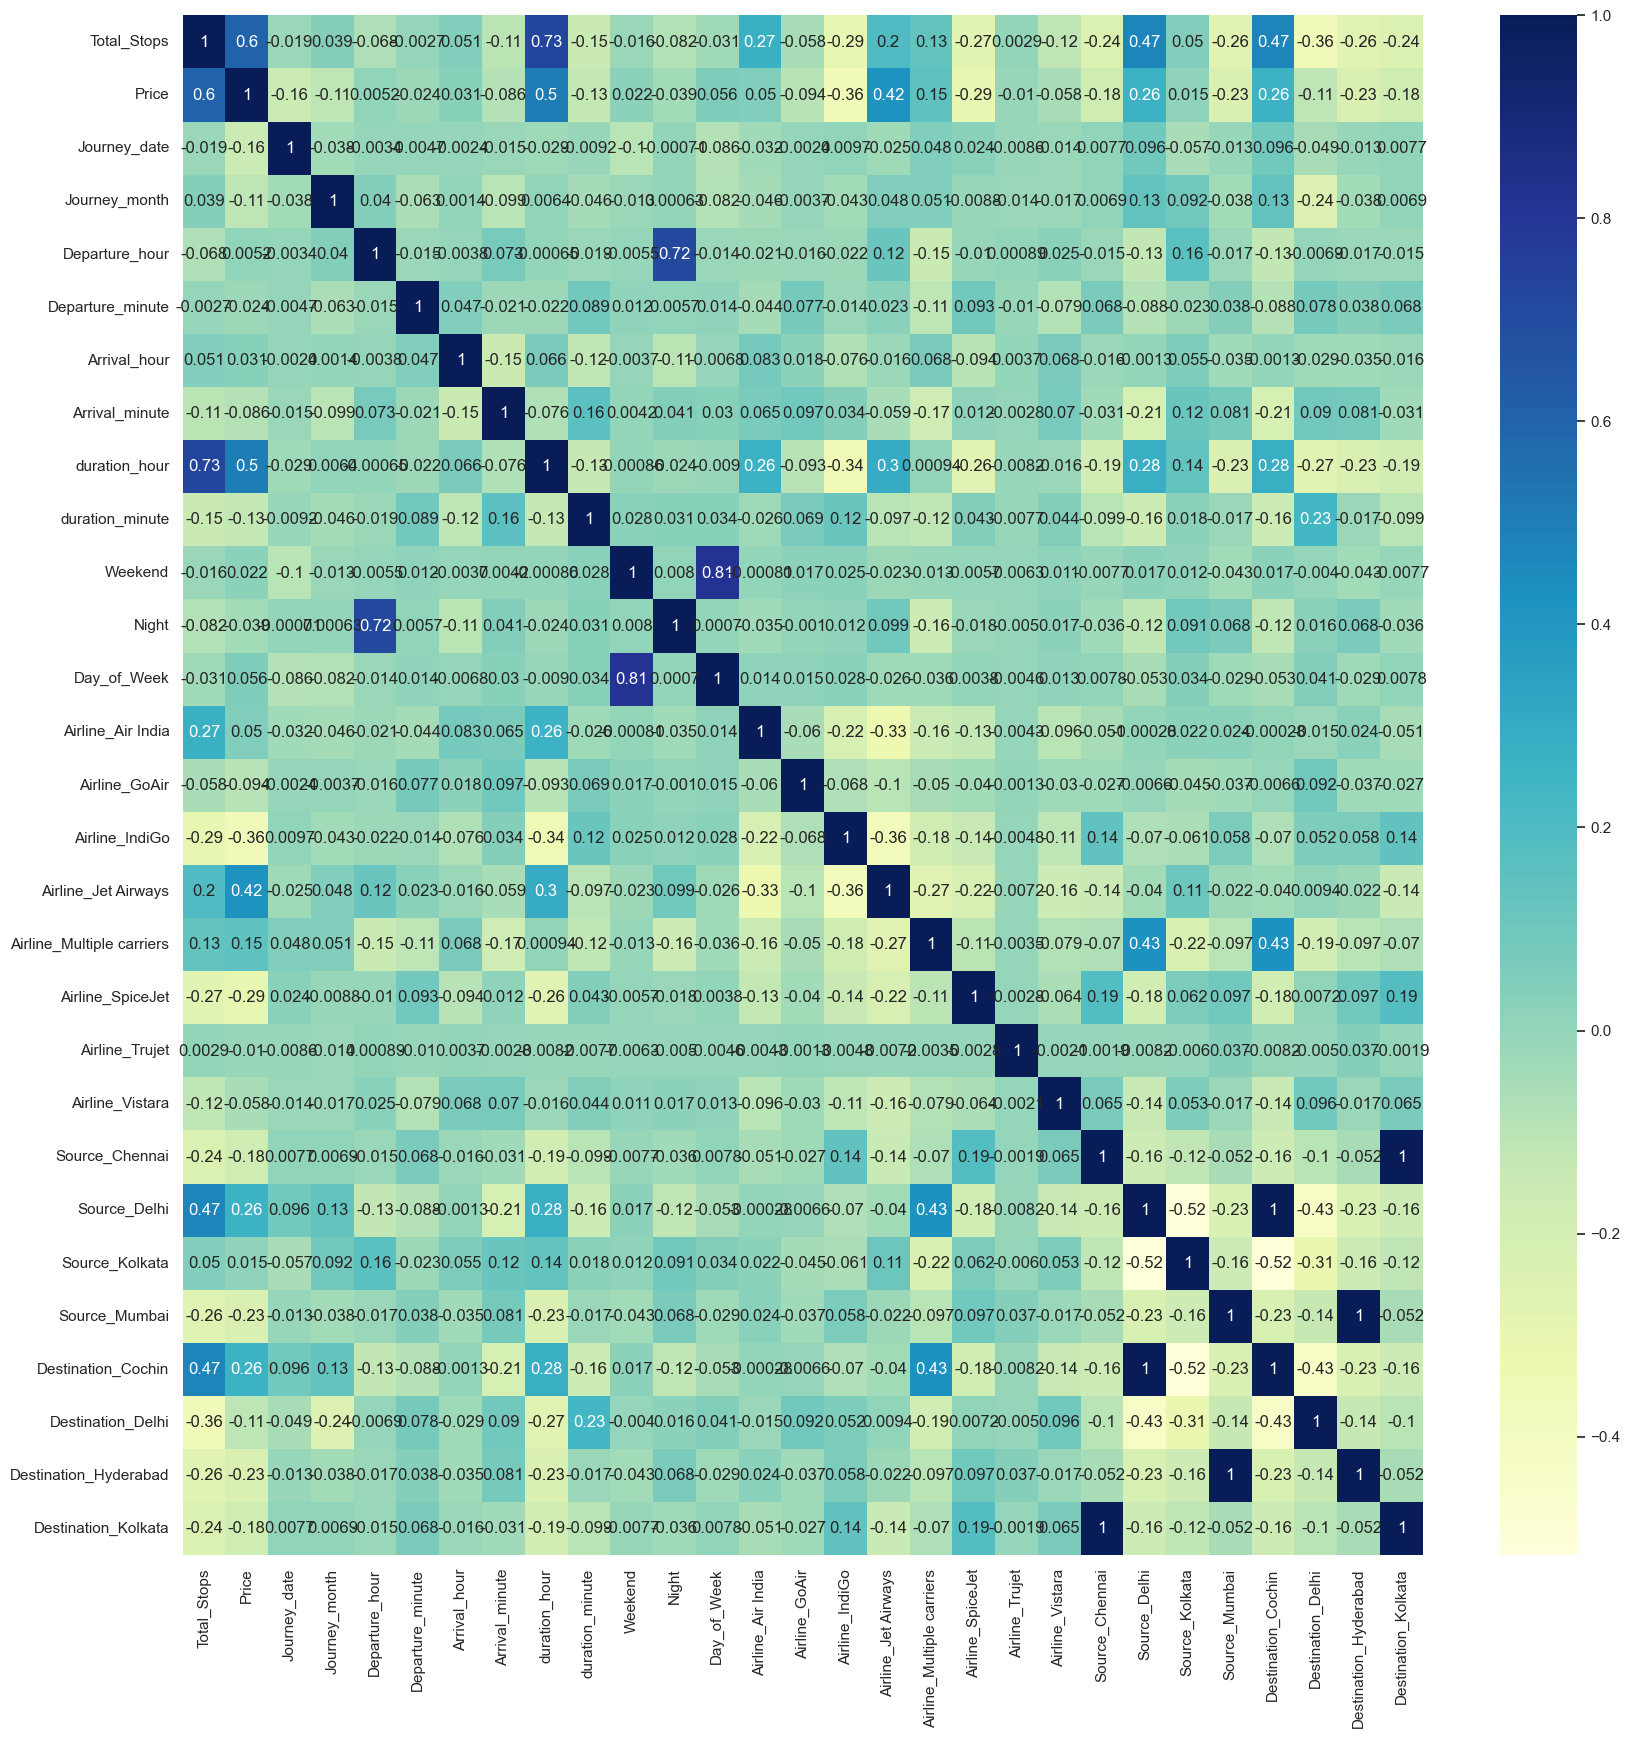

In [135]:
# Now we find some correlation between Independent and Dependent feature using heatmap

plt.figure(figsize = (20,20))
sns.heatmap(train_td.corr(), annot=True, cmap= "YlGnBu")

plt.show()

In [136]:
# Important feature using ExtratreeRegressor

from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X,y)

ExtraTreesRegressor()

In [137]:
print(selection.feature_importances_)

[2.43136884e-01 1.25652050e-01 5.95716292e-02 2.42459035e-02
 2.96380076e-02 2.93143387e-02 2.03773055e-02 1.19955238e-01
 2.03898144e-02 1.09389338e-02 7.44829142e-03 2.45977877e-02
 1.73770736e-02 2.05148851e-03 1.35424792e-02 1.48522592e-01
 3.68652440e-02 4.88967446e-03 9.81849819e-05 5.09695743e-03
 8.40211256e-04 2.92571257e-03 5.00310906e-03 1.04191403e-02
 3.22421908e-03 2.52093034e-02 7.95813212e-03 7.10293206e-04]


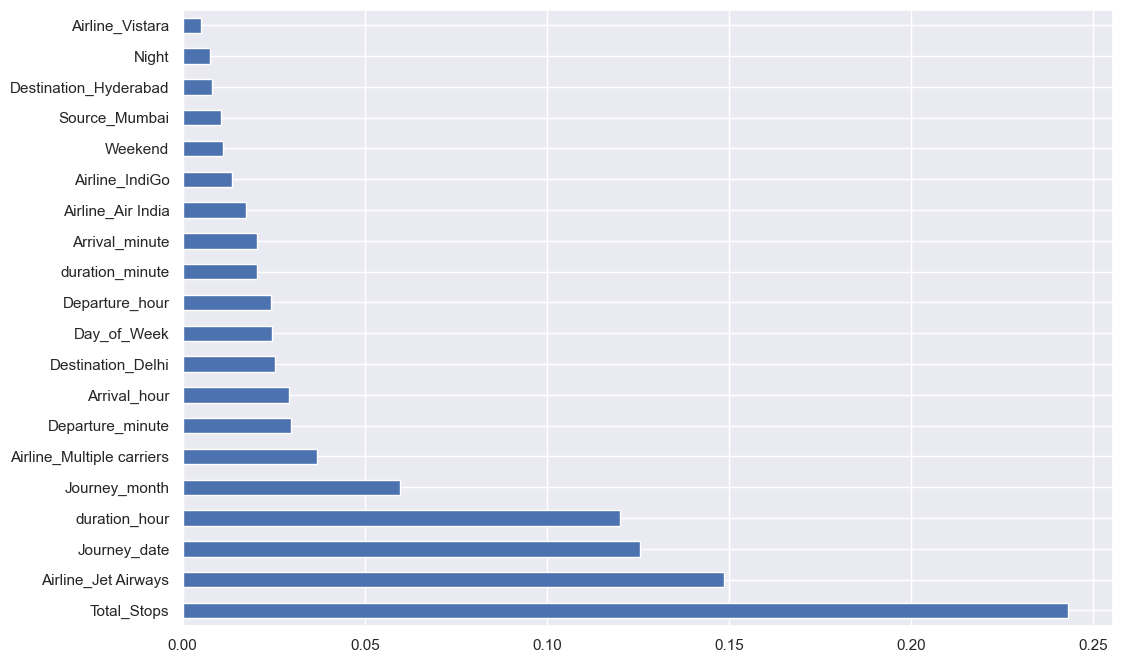

In [138]:
plt.figure(figsize =(12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [139]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [140]:
## Now applying SelectionKBest Algorithm
best_feature = SelectKBest(score_func=chi2,k=10)
best_feature.fit(X,y)

SelectKBest(score_func=<function chi2 at 0x0000021DD81771A0>)

In [141]:
# To see the scores of the feature 
best_feature.scores_

array([ 5561.20649806, 22040.27874037,  2379.92057512, 10635.78809185,
       66888.80867171, 18520.47692846, 49859.58743124, 56965.97605624,
       43259.55953798,  2493.84814643,  2612.00714913,  3783.51907199,
        8509.0112192 ,  9180.81365095,  7696.43893606,  6662.85789329,
        9061.01959673,  8480.70261881, 10461.        ,  9847.24371934,
        9861.58183006,  5991.64389038,  7432.21032951,  9565.04063989,
        5991.64389038,  8123.38574479,  9565.04063989,  9861.58183006])

In [142]:
# Now i convert this array into dataframe
dfscores=pd.DataFrame(best_feature.scores_,columns=['Score'])
dfcolumns=pd.DataFrame(X.columns)

In [143]:
X.columns

Index(['Total_Stops', 'Journey_date', 'Journey_month', 'Departure_hour',
       'Departure_minute', 'Arrival_hour', 'Arrival_minute', 'duration_hour',
       'duration_minute', 'Weekend', 'Night', 'Day_of_Week',
       'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Multiple carriers', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Source_Chennai', 'Source_Delhi',
       'Source_Kolkata', 'Source_Mumbai', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata'],
      dtype='object')

In [144]:
# now i concat this two
final_best_feature = pd.concat([dfscores,dfcolumns],axis=1)

In [145]:
final_best_feature.columns=['Scores','Feature']

In [146]:
final_best_feature

,Scores,Feature
0,5561.206498,Total_Stops
1,22040.278740,Journey_date
2,2379.920575,Journey_month
3,10635.788092,Departure_hour
4,66888.808672,Departure_minute
5,18520.476928,Arrival_hour
6,49859.587431,Arrival_minute
7,56965.976056,duration_hour
8,43259.559538,duration_minute
9,2493.848146,Weekend


In [147]:
final_best_feature.nlargest(10,'Scores')

,Scores,Feature
4,66888.808672,Departure_minute
7,56965.976056,duration_hour
6,49859.587431,Arrival_minute
8,43259.559538,duration_minute
1,22040.278740,Journey_date
5,18520.476928,Arrival_hour
3,10635.788092,Departure_hour
18,10461.000000,Airline_Trujet
20,9861.581830,Source_Chennai
27,9861.581830,Destination_Kolkata


In [148]:
X.corr()

,Total_Stops,Journey_date,Journey_month,Departure_hour,Departure_minute,Arrival_hour,Arrival_minute,duration_hour,duration_minute,Weekend,Night,Day_of_Week,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Multiple carriers,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata
Total_Stops,1.000000,-0.018937,0.039003,-0.067523,-0.002695,0.051476,-0.107099,0.730156,-0.150253,-0.015811,-0.082367,-0.031170,0.272543,-0.057547,-0.294993,0.198330,0.134868,-0.273128,0.002926,-0.118090,-0.236125,0.474480,0.050105,-0.260668,0.474480,-0.361777,-0.260668,-0.236125
Journey_date,-0.018937,1.000000,-0.038331,-0.003394,-0.004741,-0.002448,-0.015086,-0.029382,-0.009244,-0.101231,-0.000707,-0.085837,-0.031830,-0.002415,0.009730,-0.025270,0.047917,0.023608,-0.008618,-0.014327,0.007745,0.095882,-0.057415,-0.012759,0.095882,-0.049076,-0.012759,0.007745
Journey_month,0.039003,-0.038331,1.000000,0.040406,-0.062636,0.001423,-0.099261,0.006410,-0.046325,-0.013342,0.000634,-0.081877,-0.045780,-0.003707,-0.042712,0.048131,0.050586,-0.008800,-0.014295,-0.017027,0.006898,0.130845,0.091726,-0.038187,0.130845,-0.239187,-0.038187,0.006898
Departure_hour,-0.067523,-0.003394,0.040406,1.000000,-0.015068,-0.003827,0.072989,-0.000648,-0.018843,-0.005458,0.720111,-0.013829,-0.020731,-0.016309,-0.022254,0.120172,-0.154034,-0.010460,0.000890,0.024533,-0.014639,-0.125286,0.160484,-0.016968,-0.125286,-0.006931,-0.016968,-0.014639
Departure_minute,-0.002695,-0.004741,-0.062636,-0.015068,1.000000,0.046564,-0.021353,-0.022147,0.089269,0.011689,0.005707,0.013733,-0.043883,0.077403,-0.014346,0.023051,-0.110292,0.093068,-0.010084,-0.079413,0.067710,-0.087885,-0.023347,0.038091,-0.087885,0.077647,0.038091,0.067710
Arrival_hour,0.051476,-0.002448,0.001423,-0.003827,0.046564,1.000000,-0.152036,0.065586,-0.116687,-0.003735,-0.106085,-0.006822,0.083394,0.017962,-0.075624,-0.016436,0.067919,-0.093641,0.003726,0.068275,-0.016056,-0.001259,0.054661,-0.035406,-0.001259,-0.029316,-0.035406,-0.016056
Arrival_minute,-0.107099,-0.015086,-0.099261,0.072989,-0.021353,-0.152036,1.000000,-0.075942,0.156176,0.004184,0.041315,0.029659,0.064743,0.097252,0.034447,-0.058522,-0.168827,0.012123,-0.002785,0.069816,-0.031050,-0.210108,0.117536,0.081318,-0.210108,0.090352,0.081318,-0.031050
duration_hour,0.730156,-0.029382,0.006410,-0.000648,-0.022147,0.065586,-0.075942,1.000000,-0.133999,-0.000863,-0.024079,-0.008963,0.260713,-0.092784,-0.341076,0.298402,0.000940,-0.262374,-0.008200,-0.015995,-0.186251,0.280555,0.140774,-0.232258,0.280555,-0.266416,-0.232258,-0.186251
duration_minute,-0.150253,-0.009244,-0.046325,-0.018843,0.089269,-0.116687,0.156176,-0.133999,1.000000,0.028206,0.031485,0.033597,-0.026412,0.069148,0.122809,-0.096642,-0.118349,0.042655,-0.007652,0.044100,-0.098949,-0.163515,0.018156,-0.017203,-0.163515,0.234710,-0.017203,-0.098949
Weekend,-0.015811,-0.101231,-0.013342,-0.005458,0.011689,-0.003735,0.004184,-0.000863,0.028206,1.000000,0.008014,0.814921,-0.000807,0.017168,0.025469,-0.022910,-0.013132,-0.005726,-0.006304,0.010785,-0.007702,0.016679,0.012341,-0.042640,0.016679,-0.004046,-0.042640,-0.007702


In [149]:
threshold = 0.8

In [150]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr            

In [151]:
correlation(X ,threshold)

{'Day_of_Week',
 'Destination_Cochin',
 'Destination_Hyderabad',
 'Destination_Kolkata'}

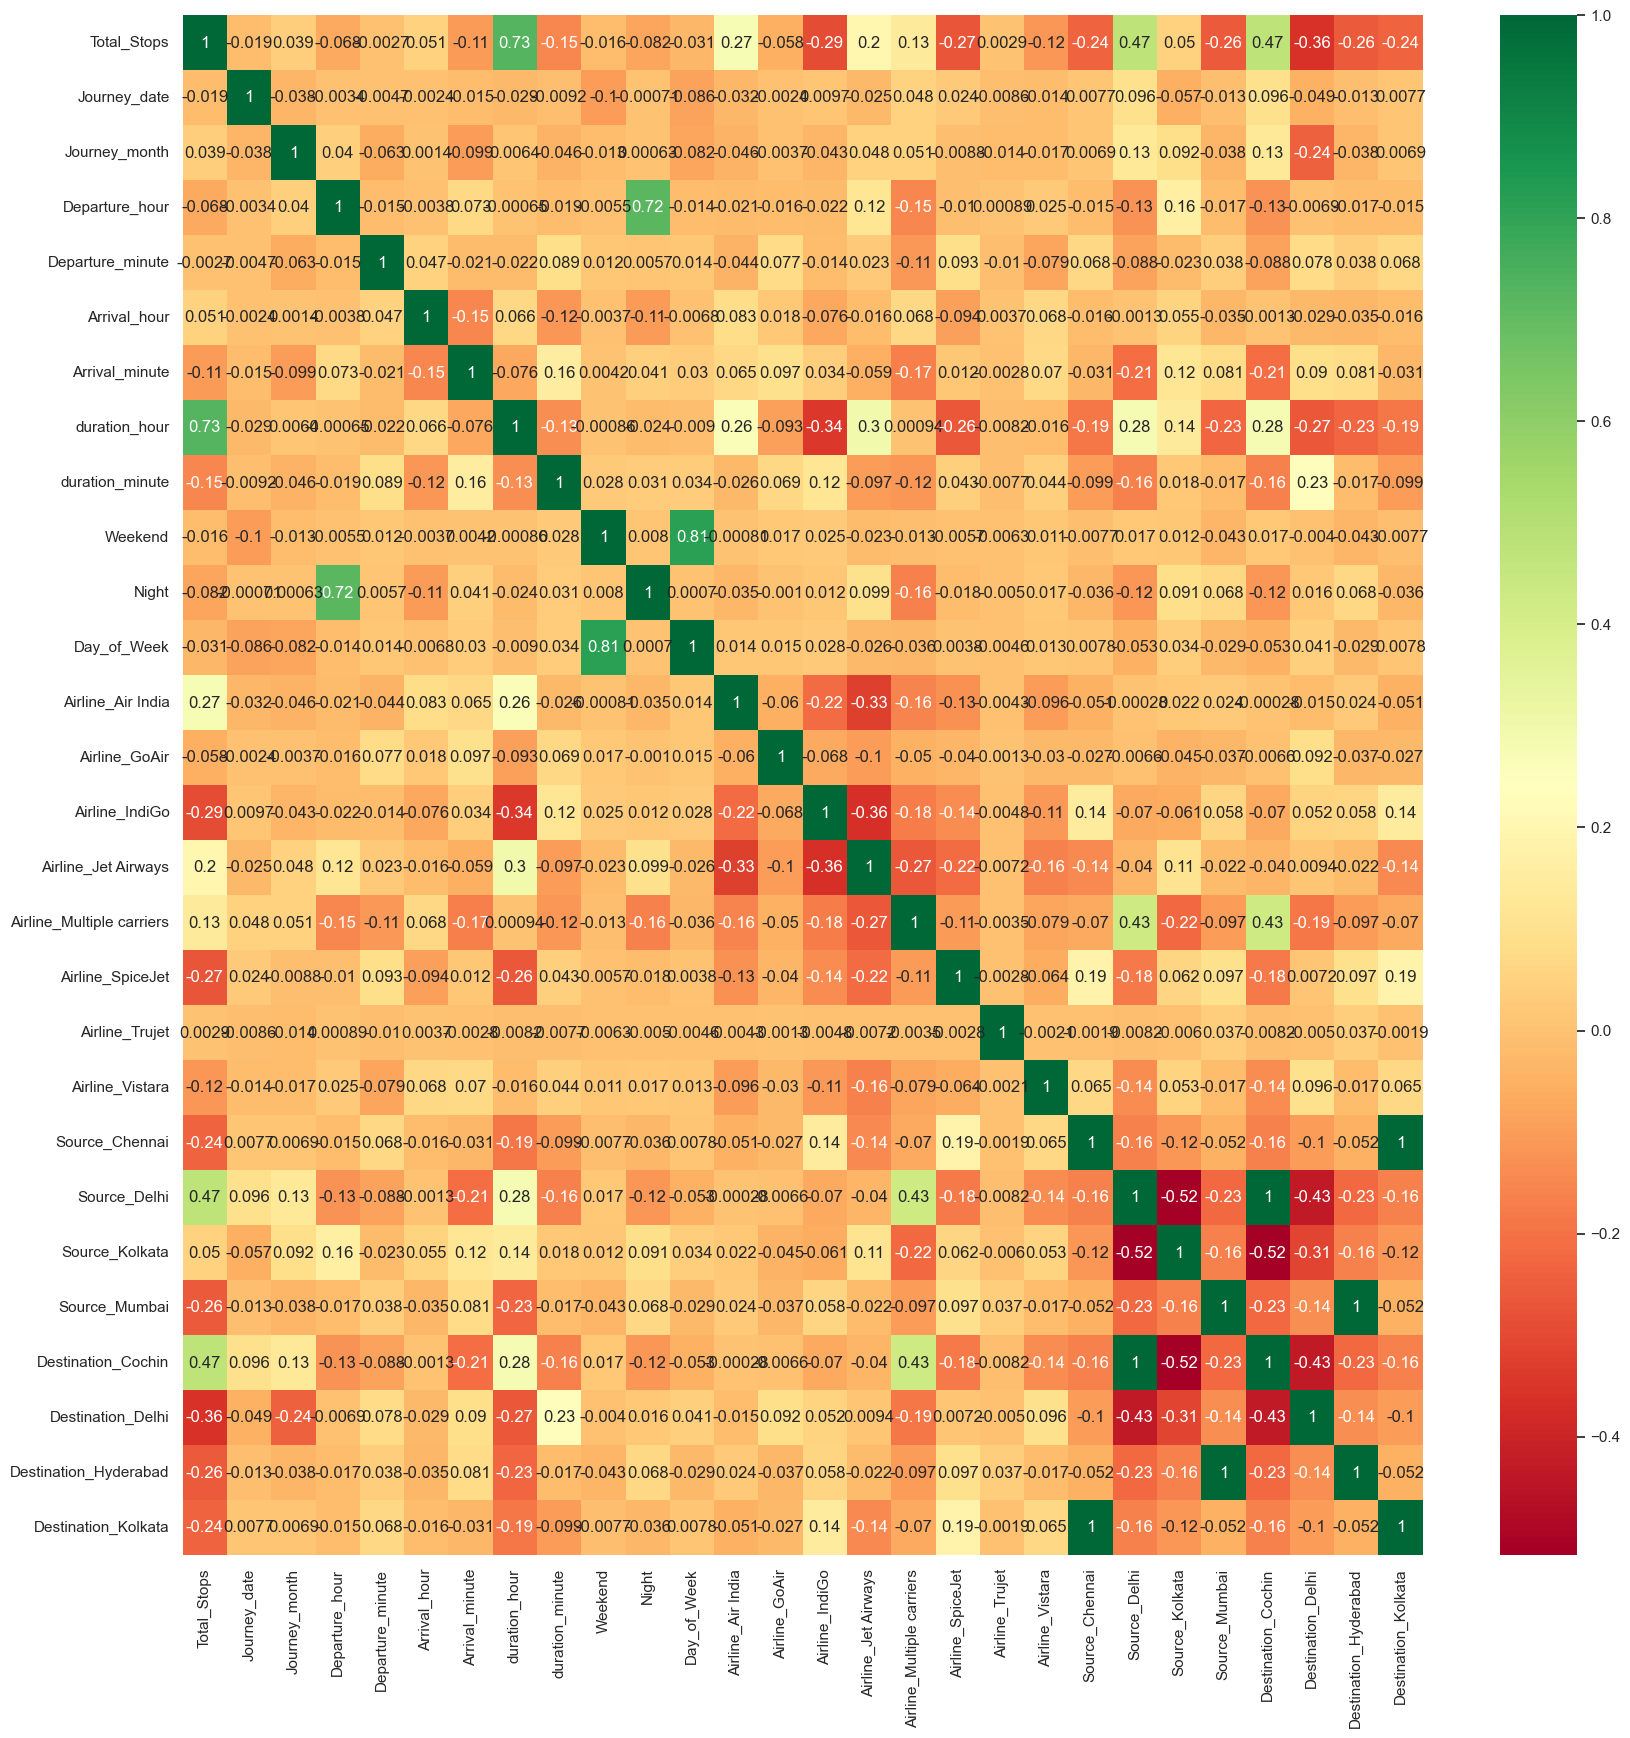

In [152]:
# This heatmap plot show how Independent Feature Highly Correlated to eachother
plt.figure(figsize = (20,20))
sns.heatmap(X.corr(), annot=True, cmap= "RdYlGn")

plt.show()

In [161]:
# Now i am storing my train data after all feature engineering and EDA and feature selection so that i can use this dataset for
# model training
#train_td.to_csv('model_data.csv',index=False)